In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("TFTP_mini.csv")

In [3]:
df

,Flow ID,SourceIP,Destination IP,Destination Port,Flow Duration,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Label
0,0,0,0,27661,3006788,0,0,0,0,0,0
1,20,0,0,18866,3002130,0,0,0,0,0,0
2,24,0,0,33024,1,0,0,0,0,0,0
3,26,0,0,32514,2,0,0,0,0,0,0
4,29,0,0,8087,2998676,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
201074,196716,0,0,52690,18000007,0,0,0,0,0,0
201075,196717,0,0,28180,11998985,0,0,0,0,0,0
201076,196718,0,0,10553,18000058,0,0,0,0,0,0
201077,196719,0,0,42708,3006606,0,0,0,0,0,0


<AxesSubplot:>

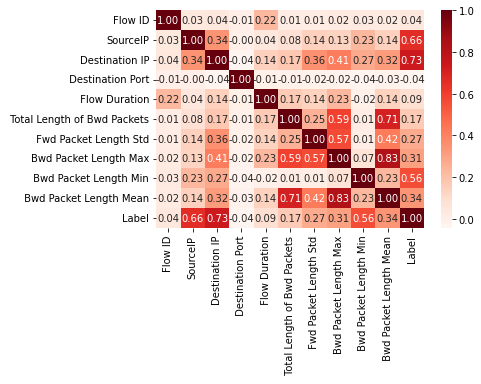

In [4]:
plt.rcParams['figure.figsize'] = (90,80)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Reds')

In [5]:
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                          Specs         Score
4                 Flow Duration 5772162871.38
5   Total Length of Bwd Packets  380903058.43
7         Bwd Packet Length Max   38505476.46
9        Bwd Packet Length Mean   14422045.03
0                       Flow ID   11360952.89
8         Bwd Packet Length Min    6545480.20
6         Fwd Packet Length Std    4158017.58
3              Destination Port    4015775.42
2                Destination IP    3328228.99
1                      SourceIP    1660533.65


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

In [8]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [02:35<00:00,  5.38s/it]


In [9]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
LogisticRegression          

In [10]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████| 42/42 [13:34<00:00, 19.39s/it] 


In [12]:
print(models)

                                         Adjusted R-Squared  \
Model                                                         
AdaBoostRegressor                                      1.00   
Lars                                                   1.00   
TransformedTargetRegressor                             1.00   
RandomForestRegressor                                  1.00   
OrthogonalMatchingPursuitCV                            1.00   
OrthogonalMatchingPursuit                              1.00   
LinearRegression                                       1.00   
BaggingRegressor                                       1.00   
LassoLarsCV                                            1.00   
LarsCV                                                 1.00   
LassoLarsIC                                            1.00   
ExtraTreesRegressor                                    1.00   
BayesianRidge                                          1.00   
DecisionTreeRegressor                                  